In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./dataSet/dataSet.csv", low_memory=False)

df = df.drop(["Unnamed: 2", "position1", "position2", "Apps"], axis=1)
df = df.replace(["-"], 0)

In [3]:
df.head()

,season,league,name,age,Mins,Tackles,Inter,Fouls,Offsides,Clear,...,Fouled,Off,Disp,UnsTch,AvgP,PS%,Crosses,LongB,ThrB,Rating
0,2019-2020,ItalySerieA,Cristiano Ronaldo Juventus,36,2919,0.4,0.2,0.8,0,0.6,...,1.8,0.9,1,2.2,36.5,85.1,0.2,0.9,0,7.82
1,2019-2020,ItalySerieA,Josip Ilicic Atalanta,33,1673,1,0.3,0.4,0,0.2,...,2.3,0.1,1.8,2,34.6,81.9,0.7,1.8,0.3,7.65
2,2019-2020,ItalySerieA,Ciro Immobile Lazio,31,3176,0.2,0.3,1,0,0.2,...,1,0.6,0.8,2.6,23.9,77,0,0.9,0.1,7.57
3,2019-2020,ItalySerieA,Luis Alberto Lazio,29,3122,1.4,0.6,0.6,0,0.2,...,1.1,0,1.3,1.4,57.6,83.5,1.2,3.1,0.4,7.55
4,2019-2020,ItalySerieA,Papu Gómez Atalanta,33,2861,0.8,0.5,0.5,0,0.1,...,2.1,0.1,1.1,1.6,47.8,85.3,1.8,2.1,0.1,7.55


In [5]:
for i in range(3, 28):
    df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20426 entries, 0 to 20425
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   season    20426 non-null  object 
 1   league    20426 non-null  object 
 2   name      20426 non-null  object 
 3   age       20426 non-null  int64  
 4   Mins      20426 non-null  int64  
 5   Tackles   20426 non-null  float64
 6   Inter     20426 non-null  float64
 7   Fouls     20426 non-null  float64
 8   Offsides  20426 non-null  float64
 9   Clear     20426 non-null  float64
 10  Drb       20426 non-null  float64
 11  Blocks    20426 non-null  float64
 12  OwnG      20426 non-null  int64  
 13  Goals     20426 non-null  int64  
 14  Assists   20426 non-null  int64  
 15  SpG       20426 non-null  float64
 16  KeyP      20426 non-null  float64
 17  Drb.1     20426 non-null  float64
 18  Fouled    20426 non-null  float64
 19  Off       20426 non-null  float64
 20  Disp      20426 non-null  fl

In [6]:
null_index = df[df.isnull().any(axis=1)].index
df[df.isnull().any(axis=1)]

,season,league,name,age,Mins,Tackles,Inter,Fouls,Offsides,Clear,...,Fouled,Off,Disp,UnsTch,AvgP,PS%,Crosses,LongB,ThrB,Rating


In [7]:
df = df.drop(null_index)
df.reset_index(drop=True, inplace=True)

In [8]:
df

,season,league,name,age,Mins,Tackles,Inter,Fouls,Offsides,Clear,...,Fouled,Off,Disp,UnsTch,AvgP,PS%,Crosses,LongB,ThrB,Rating
0,2019-2020,ItalySerieA,Cristiano Ronaldo Juventus,36,2919,0.4,0.2,0.8,0.0,0.6,...,1.8,0.9,1.0,2.2,36.5,85.1,0.2,0.9,0.0,7.82
1,2019-2020,ItalySerieA,Josip Ilicic Atalanta,33,1673,1.0,0.3,0.4,0.0,0.2,...,2.3,0.1,1.8,2.0,34.6,81.9,0.7,1.8,0.3,7.65
2,2019-2020,ItalySerieA,Ciro Immobile Lazio,31,3176,0.2,0.3,1.0,0.0,0.2,...,1.0,0.6,0.8,2.6,23.9,77.0,0.0,0.9,0.1,7.57
3,2019-2020,ItalySerieA,Luis Alberto Lazio,29,3122,1.4,0.6,0.6,0.0,0.2,...,1.1,0.0,1.3,1.4,57.6,83.5,1.2,3.1,0.4,7.55
4,2019-2020,ItalySerieA,Papu Gómez Atalanta,33,2861,0.8,0.5,0.5,0.0,0.1,...,2.1,0.1,1.1,1.6,47.8,85.3,1.8,2.1,0.1,7.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20421,2020,USA,Erik Holt Salt Lake,25,288,0.8,0.2,0.8,1.0,1.2,...,0.2,0.0,0.0,0.2,33.6,76.8,0.0,3.2,0.0,5.87
20422,2020,USA,Jack Skahan San Jose,23,11,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,9.0,88.9,0.0,2.0,0.0,5.87
20423,2020,USA,Michael Salazar Houston,29,12,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,100.0,0.0,0.0,0.0,5.80
20424,2020,USA,Bobby Edwards FC Cincinnati,26,180,0.0,0.0,0.0,0.0,1.5,...,0.0,0.0,0.0,0.0,18.5,45.9,0.0,6.5,0.0,5.71


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, random_state=13)

In [10]:
X_train

,season,league,name,age,Mins,Tackles,Inter,Fouls,Offsides,Clear,...,Fouled,Off,Disp,UnsTch,AvgP,PS%,Crosses,LongB,ThrB,Rating
2323,2020-2021,LigaProfesional,Yeison Gordillo San Lorenzo,29,1241,3.6,1.2,2.7,0.1,1.2,...,0.8,0.0,0.4,0.7,27.0,77.0,0.0,0.7,0.0,6.53
3386,2019-2020,Bundesliga2,Denis Linsmayer Sandhausen,30,2525,1.6,1.1,1.5,0.0,1.6,...,1.6,0.0,0.5,0.7,29.3,79.2,0.2,1.1,0.0,6.77
8533,2020-2021,SuperLig,Ahmet Gulay Alanyaspor,18,220,1.0,0.3,0.8,0.3,0.8,...,0.5,0.0,0.5,0.0,19.3,81.8,0.0,1.0,0.0,6.41
8565,2020-2021,SuperLig,Mete Demir Istanbul Basaksehir,23,92,1.0,0.3,0.5,0.0,0.0,...,0.8,0.0,0.8,0.5,9.3,78.4,0.0,0.0,0.0,6.36
13707,2019-2020,PremierLeague,Jeffrey Schlupp Crystal Palace,28,1035,1.1,0.8,1.0,0.0,0.6,...,0.7,0.1,0.9,1.5,18.5,75.8,0.1,0.5,0.0,6.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2019-2020,ItalySerieA,Karol Linetty Sampdoria,26,2022,2.2,0.9,1.5,0.0,0.6,...,1.2,0.0,0.9,1.8,25.9,79.7,0.3,1.0,0.0,6.77
866,2020-2021,ItalySerieA,Felipe Caicedo Lazio,33,922,0.4,0.2,1.0,0.0,0.1,...,0.7,0.3,0.2,1.1,10.3,71.3,0.0,0.2,0.0,6.55
74,2019-2020,ItalySerieA,Kwadwo Asamoah Inter,33,639,1.3,1.1,0.8,0.0,1.5,...,0.8,0.3,0.8,0.5,38.9,83.0,0.1,1.1,0.0,6.94
14512,2019-2020,LigaNOS,Gabriel Pires Benfica,28,1633,2.6,1.5,1.5,0.1,0.8,...,1.7,0.0,1.2,1.2,57.9,78.7,0.1,5.7,0.0,7.30


In [11]:
X_test

,season,league,name,age,Mins,Tackles,Inter,Fouls,Offsides,Clear,...,Fouled,Off,Disp,UnsTch,AvgP,PS%,Crosses,LongB,ThrB,Rating
1212,2020-2021,ItalySerieA,Petar Micin Udinese,23,14,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,88.9,0.0,1.0,0.0,5.91
7951,2019-2020,SuperLig,Sener Özbayrakli Galatasaray,31,332,1.3,0.6,0.5,0.3,0.9,...,0.9,0.3,0.5,0.5,15.3,81.1,0.1,0.8,0.0,6.35
14989,2019-2020,LigaNOS,Charles-Andreas Brym Belenenses SAD,23,9,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,4.0,75.0,0.0,0.0,0.0,6.14
12604,2019-2020,LeagueTwo,Jimmy Knowles Mansfield,20,40,0.2,0.0,0.0,0.0,0.0,...,0.2,0.0,0.4,0.2,1.4,85.7,0.0,0.2,0.2,6.25
17226,2020-2021,RussiaPremier,Hördur Magnússon CSKA Moscow,28,1855,0.9,1.5,1.1,0.4,3.0,...,0.9,0.0,0.1,0.0,53.0,79.9,0.1,6.5,0.0,6.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,2020-2021,ItalySerieA,Valentin Antov Bologna,21,229,0.8,0.8,0.4,0.2,2.2,...,0.4,0.0,0.0,0.4,23.0,89.6,0.0,1.8,0.0,6.23
13737,2019-2020,PremierLeague,David Luiz Arsenal,34,2811,0.8,1.0,0.9,0.5,3.8,...,0.4,0.0,0.2,0.5,54.5,85.1,0.1,4.9,0.1,6.58
12291,2019-2020,LeagueTwo,Steven Old Morecambe,35,3263,0.8,0.8,0.7,0.3,5.2,...,0.3,0.0,0.0,0.4,28.9,56.8,0.1,2.8,0.0,6.66
6067,2020-2021,Ligue1,Arbër Zeneli Reims,26,1293,0.7,0.1,0.5,0.0,0.1,...,0.9,0.2,0.9,2.0,12.0,79.1,0.4,0.1,0.0,6.55


In [12]:
X_train.to_csv("./dataSet/X_train.csv", index=False)

In [13]:
X_test.to_csv("./dataSet/X_test.csv", index=False)

In [14]:
X_train = pd.read_csv('./dataSet/X_train.csv')

In [15]:
X_test = pd.read_csv('./dataSet/X_test.csv')

In [16]:
X_train

,season,league,name,age,Mins,Tackles,Inter,Fouls,Offsides,Clear,...,Fouled,Off,Disp,UnsTch,AvgP,PS%,Crosses,LongB,ThrB,Rating
0,2020-2021,LigaProfesional,Yeison Gordillo San Lorenzo,29,1241,3.6,1.2,2.7,0.1,1.2,...,0.8,0.0,0.4,0.7,27.0,77.0,0.0,0.7,0.0,6.53
1,2019-2020,Bundesliga2,Denis Linsmayer Sandhausen,30,2525,1.6,1.1,1.5,0.0,1.6,...,1.6,0.0,0.5,0.7,29.3,79.2,0.2,1.1,0.0,6.77
2,2020-2021,SuperLig,Ahmet Gulay Alanyaspor,18,220,1.0,0.3,0.8,0.3,0.8,...,0.5,0.0,0.5,0.0,19.3,81.8,0.0,1.0,0.0,6.41
3,2020-2021,SuperLig,Mete Demir Istanbul Basaksehir,23,92,1.0,0.3,0.5,0.0,0.0,...,0.8,0.0,0.8,0.5,9.3,78.4,0.0,0.0,0.0,6.36
4,2019-2020,PremierLeague,Jeffrey Schlupp Crystal Palace,28,1035,1.1,0.8,1.0,0.0,0.6,...,0.7,0.1,0.9,1.5,18.5,75.8,0.1,0.5,0.0,6.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15314,2019-2020,ItalySerieA,Karol Linetty Sampdoria,26,2022,2.2,0.9,1.5,0.0,0.6,...,1.2,0.0,0.9,1.8,25.9,79.7,0.3,1.0,0.0,6.77
15315,2020-2021,ItalySerieA,Felipe Caicedo Lazio,33,922,0.4,0.2,1.0,0.0,0.1,...,0.7,0.3,0.2,1.1,10.3,71.3,0.0,0.2,0.0,6.55
15316,2019-2020,ItalySerieA,Kwadwo Asamoah Inter,33,639,1.3,1.1,0.8,0.0,1.5,...,0.8,0.3,0.8,0.5,38.9,83.0,0.1,1.1,0.0,6.94
15317,2019-2020,LigaNOS,Gabriel Pires Benfica,28,1633,2.6,1.5,1.5,0.1,0.8,...,1.7,0.0,1.2,1.2,57.9,78.7,0.1,5.7,0.0,7.30


In [17]:
X_test

,season,league,name,age,Mins,Tackles,Inter,Fouls,Offsides,Clear,...,Fouled,Off,Disp,UnsTch,AvgP,PS%,Crosses,LongB,ThrB,Rating
0,2020-2021,ItalySerieA,Petar Micin Udinese,23,14,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,88.9,0.0,1.0,0.0,5.91
1,2019-2020,SuperLig,Sener Özbayrakli Galatasaray,31,332,1.3,0.6,0.5,0.3,0.9,...,0.9,0.3,0.5,0.5,15.3,81.1,0.1,0.8,0.0,6.35
2,2019-2020,LigaNOS,Charles-Andreas Brym Belenenses SAD,23,9,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,4.0,75.0,0.0,0.0,0.0,6.14
3,2019-2020,LeagueTwo,Jimmy Knowles Mansfield,20,40,0.2,0.0,0.0,0.0,0.0,...,0.2,0.0,0.4,0.2,1.4,85.7,0.0,0.2,0.2,6.25
4,2020-2021,RussiaPremier,Hördur Magnússon CSKA Moscow,28,1855,0.9,1.5,1.1,0.4,3.0,...,0.9,0.0,0.1,0.0,53.0,79.9,0.1,6.5,0.0,6.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,2020-2021,ItalySerieA,Valentin Antov Bologna,21,229,0.8,0.8,0.4,0.2,2.2,...,0.4,0.0,0.0,0.4,23.0,89.6,0.0,1.8,0.0,6.23
5103,2019-2020,PremierLeague,David Luiz Arsenal,34,2811,0.8,1.0,0.9,0.5,3.8,...,0.4,0.0,0.2,0.5,54.5,85.1,0.1,4.9,0.1,6.58
5104,2019-2020,LeagueTwo,Steven Old Morecambe,35,3263,0.8,0.8,0.7,0.3,5.2,...,0.3,0.0,0.0,0.4,28.9,56.8,0.1,2.8,0.0,6.66
5105,2020-2021,Ligue1,Arbër Zeneli Reims,26,1293,0.7,0.1,0.5,0.0,0.1,...,0.9,0.2,0.9,2.0,12.0,79.1,0.4,0.1,0.0,6.55


In [18]:
X_train = X_train[X_train["Mins"] >900]

In [19]:
X_test = X_test[X_test["Mins"] >900]

In [20]:
X_train_last = X_train

In [21]:
X_test_last = X_test

In [22]:
X_train.reset_index(drop=True, inplace=True)

In [23]:
X_test.reset_index(drop=True, inplace=True)

In [24]:
X_train

,season,league,name,age,Mins,Tackles,Inter,Fouls,Offsides,Clear,...,Fouled,Off,Disp,UnsTch,AvgP,PS%,Crosses,LongB,ThrB,Rating
0,2020-2021,LigaProfesional,Yeison Gordillo San Lorenzo,29,1241,3.6,1.2,2.7,0.1,1.2,...,0.8,0.0,0.4,0.7,27.0,77.0,0.0,0.7,0.0,6.53
1,2019-2020,Bundesliga2,Denis Linsmayer Sandhausen,30,2525,1.6,1.1,1.5,0.0,1.6,...,1.6,0.0,0.5,0.7,29.3,79.2,0.2,1.1,0.0,6.77
2,2019-2020,PremierLeague,Jeffrey Schlupp Crystal Palace,28,1035,1.1,0.8,1.0,0.0,0.6,...,0.7,0.1,0.9,1.5,18.5,75.8,0.1,0.5,0.0,6.62
3,2020-2021,Eredivsie,Willem Janssen FC Utrecht,35,1709,1.1,2.0,0.9,0.2,2.6,...,0.3,0.0,0.0,0.1,48.6,85.0,0.0,4.2,0.0,6.88
4,2019-2020,SuperLig,Ricardo Faty Ankaragucu,35,2061,1.8,1.2,2.1,0.0,1.2,...,0.9,0.0,0.6,1.5,26.8,73.9,0.1,1.3,0.0,6.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8014,2020-2021,Bundesliga2,Christian Mathenia Nuernberg,29,3060,0.0,0.0,0.0,0.0,0.6,...,0.2,0.0,0.0,0.0,33.3,67.9,0.0,6.2,0.0,6.45
8015,2019-2020,ItalySerieA,Karol Linetty Sampdoria,26,2022,2.2,0.9,1.5,0.0,0.6,...,1.2,0.0,0.9,1.8,25.9,79.7,0.3,1.0,0.0,6.77
8016,2020-2021,ItalySerieA,Felipe Caicedo Lazio,33,922,0.4,0.2,1.0,0.0,0.1,...,0.7,0.3,0.2,1.1,10.3,71.3,0.0,0.2,0.0,6.55
8017,2019-2020,LigaNOS,Gabriel Pires Benfica,28,1633,2.6,1.5,1.5,0.1,0.8,...,1.7,0.0,1.2,1.2,57.9,78.7,0.1,5.7,0.0,7.30


In [25]:
X_test

,season,league,name,age,Mins,Tackles,Inter,Fouls,Offsides,Clear,...,Fouled,Off,Disp,UnsTch,AvgP,PS%,Crosses,LongB,ThrB,Rating
0,2020-2021,RussiaPremier,Hördur Magnússon CSKA Moscow,28,1855,0.9,1.5,1.1,0.4,3.0,...,0.9,0.0,0.1,0.0,53.0,79.9,0.1,6.5,0.0,6.81
1,2020-2021,LigaProfesional,Juan Sánchez Miño Estudiantes,31,1273,1.6,0.5,1.0,0.1,0.1,...,0.6,0.1,1.2,1.7,30.6,75.0,0.5,1.6,0.0,6.46
2,2019-2020,Bundesliga2,Hendrik Weydandt Hannover,26,1662,0.6,0.1,1.6,0.0,0.8,...,1.5,0.4,0.9,2.8,16.3,60.3,0.2,0.3,0.0,6.93
3,2019,Brazil,Romarinho Fortaleza,27,2299,0.5,0.2,0.6,0.0,0.1,...,2.3,0.1,1.8,1.9,19.2,84.0,0.3,0.5,0.1,6.87
4,2020,Brazil,Miranda Vasco da Gama,21,1362,1.7,1.5,1.1,0.4,3.2,...,0.6,0.0,0.2,0.6,42.2,82.3,0.0,3.7,0.0,6.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681,2019-2020,Championship,Kieran Gibbs West Brom,32,991,1.1,1.1,0.6,0.1,1.2,...,0.2,0.0,0.4,0.6,39.6,81.8,0.3,1.0,0.0,6.69
2682,2019-2020,PremierLeague,David Luiz Arsenal,34,2811,0.8,1.0,0.9,0.5,3.8,...,0.4,0.0,0.2,0.5,54.5,85.1,0.1,4.9,0.1,6.58
2683,2019-2020,LeagueTwo,Steven Old Morecambe,35,3263,0.8,0.8,0.7,0.3,5.2,...,0.3,0.0,0.0,0.4,28.9,56.8,0.1,2.8,0.0,6.66
2684,2020-2021,Ligue1,Arbër Zeneli Reims,26,1293,0.7,0.1,0.5,0.0,0.1,...,0.9,0.2,0.9,2.0,12.0,79.1,0.4,0.1,0.0,6.55


In [26]:
X_train_ori = X_train.loc[:, ["season", "league", "name"]]

In [27]:
X_test_ori = X_test.loc[:, ["season", "league", "name"]]

In [28]:
X_train_ori

,season,league,name
0,2020-2021,LigaProfesional,Yeison Gordillo San Lorenzo
1,2019-2020,Bundesliga2,Denis Linsmayer Sandhausen
2,2019-2020,PremierLeague,Jeffrey Schlupp Crystal Palace
3,2020-2021,Eredivsie,Willem Janssen FC Utrecht
4,2019-2020,SuperLig,Ricardo Faty Ankaragucu
...,...,...,...
8014,2020-2021,Bundesliga2,Christian Mathenia Nuernberg
8015,2019-2020,ItalySerieA,Karol Linetty Sampdoria
8016,2020-2021,ItalySerieA,Felipe Caicedo Lazio
8017,2019-2020,LigaNOS,Gabriel Pires Benfica


In [29]:
X_test_ori

,season,league,name
0,2020-2021,RussiaPremier,Hördur Magnússon CSKA Moscow
1,2020-2021,LigaProfesional,Juan Sánchez Miño Estudiantes
2,2019-2020,Bundesliga2,Hendrik Weydandt Hannover
3,2019,Brazil,Romarinho Fortaleza
4,2020,Brazil,Miranda Vasco da Gama
...,...,...,...
2681,2019-2020,Championship,Kieran Gibbs West Brom
2682,2019-2020,PremierLeague,David Luiz Arsenal
2683,2019-2020,LeagueTwo,Steven Old Morecambe
2684,2020-2021,Ligue1,Arbër Zeneli Reims


In [30]:
X_train = X_train.drop(["season", "league", "name"], axis=1)

In [31]:
X_test = X_test.drop(["season", "league", "name"], axis=1)

In [32]:
X_train

,age,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,...,Fouled,Off,Disp,UnsTch,AvgP,PS%,Crosses,LongB,ThrB,Rating
0,29,1241,3.6,1.2,2.7,0.1,1.2,1.6,0.2,0,...,0.8,0.0,0.4,0.7,27.0,77.0,0.0,0.7,0.0,6.53
1,30,2525,1.6,1.1,1.5,0.0,1.6,0.7,0.6,0,...,1.6,0.0,0.5,0.7,29.3,79.2,0.2,1.1,0.0,6.77
2,28,1035,1.1,0.8,1.0,0.0,0.6,0.6,0.2,0,...,0.7,0.1,0.9,1.5,18.5,75.8,0.1,0.5,0.0,6.62
3,35,1709,1.1,2.0,0.9,0.2,2.6,0.1,0.8,0,...,0.3,0.0,0.0,0.1,48.6,85.0,0.0,4.2,0.0,6.88
4,35,2061,1.8,1.2,2.1,0.0,1.2,1.6,0.3,0,...,0.9,0.0,0.6,1.5,26.8,73.9,0.1,1.3,0.0,6.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8014,29,3060,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0,...,0.2,0.0,0.0,0.0,33.3,67.9,0.0,6.2,0.0,6.45
8015,26,2022,2.2,0.9,1.5,0.0,0.6,1.6,0.1,0,...,1.2,0.0,0.9,1.8,25.9,79.7,0.3,1.0,0.0,6.77
8016,33,922,0.4,0.2,1.0,0.0,0.1,0.3,0.0,0,...,0.7,0.3,0.2,1.1,10.3,71.3,0.0,0.2,0.0,6.55
8017,28,1633,2.6,1.5,1.5,0.1,0.8,1.2,0.2,0,...,1.7,0.0,1.2,1.2,57.9,78.7,0.1,5.7,0.0,7.30


In [33]:
X_test

,age,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,...,Fouled,Off,Disp,UnsTch,AvgP,PS%,Crosses,LongB,ThrB,Rating
0,28,1855,0.9,1.5,1.1,0.4,3.0,0.4,0.6,0,...,0.9,0.0,0.1,0.0,53.0,79.9,0.1,6.5,0.0,6.81
1,31,1273,1.6,0.5,1.0,0.1,0.1,1.0,0.1,0,...,0.6,0.1,1.2,1.7,30.6,75.0,0.5,1.6,0.0,6.46
2,26,1662,0.6,0.1,1.6,0.0,0.8,0.2,0.1,0,...,1.5,0.4,0.9,2.8,16.3,60.3,0.2,0.3,0.0,6.93
3,27,2299,0.5,0.2,0.6,0.0,0.1,0.9,0.0,0,...,2.3,0.1,1.8,1.9,19.2,84.0,0.3,0.5,0.1,6.87
4,21,1362,1.7,1.5,1.1,0.4,3.2,0.6,1.0,0,...,0.6,0.0,0.2,0.6,42.2,82.3,0.0,3.7,0.0,6.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681,32,991,1.1,1.1,0.6,0.1,1.2,0.9,0.3,0,...,0.2,0.0,0.4,0.6,39.6,81.8,0.3,1.0,0.0,6.69
2682,34,2811,0.8,1.0,0.9,0.5,3.8,0.3,1.1,0,...,0.4,0.0,0.2,0.5,54.5,85.1,0.1,4.9,0.1,6.58
2683,35,3263,0.8,0.8,0.7,0.3,5.2,0.1,0.8,0,...,0.3,0.0,0.0,0.4,28.9,56.8,0.1,2.8,0.0,6.66
2684,26,1293,0.7,0.1,0.5,0.0,0.1,0.5,0.0,0,...,0.9,0.2,0.9,2.0,12.0,79.1,0.4,0.1,0.0,6.55


In [34]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_train = pd.DataFrame(standard_scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(standard_scaler.fit_transform(X_test), columns=X_test.columns)

In [35]:
X_train_check = pd.concat([X_train_ori, X_train], axis=1)

In [36]:
X_test_check = pd.concat([X_test_ori, X_test], axis=1)

In [37]:
important_features_defen = ['Tackles', 'Inter', 'Blocks' ]
important_features_offen = ['Goals', 'Assists']
select = important_features_defen + important_features_offen
select

['Tackles', 'Inter', 'Blocks', 'Goals', 'Assists']

In [38]:
reduced_train = X_train[select]

In [39]:
reduced_test = X_test[select]

In [40]:
reduced_train

,Tackles,Inter,Blocks,Goals,Assists
0,3.423824,0.591103,-0.157279,-0.684577,-0.811162
1,0.608842,0.425379,1.335731,-0.684577,0.116492
2,-0.094903,-0.071795,-0.157279,0.114921,-0.347335
3,-0.094903,1.916901,2.082236,-0.684577,-0.811162
4,0.890340,0.591103,0.215974,-0.684577,-0.811162
...,...,...,...,...,...
8014,-1.643144,-1.397593,-0.903784,-0.684577,-0.811162
8015,1.453337,0.093929,-0.530532,0.381421,0.580319
8016,-1.080147,-1.066144,-0.903784,1.447418,-0.811162
8017,2.016333,1.088278,-0.157279,-0.151578,0.116492


In [41]:
reduced_test

,Tackles,Inter,Blocks,Goals,Assists
0,-0.408907,1.109901,1.316679,-0.426705,-0.349844
1,0.588017,-0.579735,-0.530302,-0.705027,-0.349844
2,-0.836161,-1.255590,-0.530302,1.799871,1.035434
3,-0.978578,-1.086626,-0.899698,0.129939,1.035434
4,0.730434,1.109901,2.794263,-0.705027,-0.811603
...,...,...,...,...,...
2681,-0.124072,0.434047,0.208490,-0.426705,0.111916
2682,-0.551325,0.265083,3.163659,-0.148383,-0.349844
2683,-0.551325,-0.072844,2.055471,-0.148383,-0.349844
2684,-0.693743,-1.255590,-0.899698,0.129939,0.573675


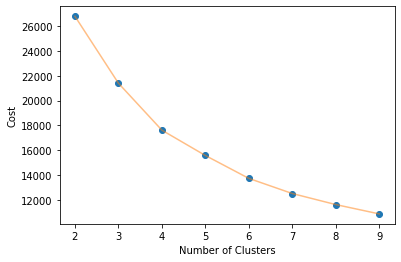

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Find elbow point

def change_n_clusters(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster, random_state=42)
        kmeans.fit(reduced_train)
        sum_of_squared_distance.append(kmeans.inertia_)
        
    plt.plot(n_clusters , sum_of_squared_distance , 'o')
    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Cost')
    
n_clusters = [2,3,4,5,6,7,8,9]
change_n_clusters(n_clusters, reduced_train)

In [43]:
#모델에 대한 결과 확인 예시 코드

kmeans = KMeans(n_clusters=300)
kmeans.fit(reduced_train)

result_by_sklearn_train = reduced_train.copy()
result_by_sklearn_train["cluster"] = kmeans.labels_
result_by_sklearn_train.head()

result_by_sklearn_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8019 entries, 0 to 8018
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tackles  8019 non-null   float64
 1   Inter    8019 non-null   float64
 2   Blocks   8019 non-null   float64
 3   Goals    8019 non-null   float64
 4   Assists  8019 non-null   float64
 5   cluster  8019 non-null   int32  
dtypes: float64(5), int32(1)
memory usage: 344.7 KB


In [44]:
#모델에 대한 결과 확인 예시 코드

kmeans = KMeans(n_clusters=300)
kmeans.fit(reduced_test)

result_by_sklearn_test = reduced_test.copy()
result_by_sklearn_test["cluster"] = kmeans.labels_
result_by_sklearn_test.head()

result_by_sklearn_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2686 entries, 0 to 2685
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tackles  2686 non-null   float64
 1   Inter    2686 non-null   float64
 2   Blocks   2686 non-null   float64
 3   Goals    2686 non-null   float64
 4   Assists  2686 non-null   float64
 5   cluster  2686 non-null   int32  
dtypes: float64(5), int32(1)
memory usage: 115.5 KB


In [45]:
result_by_sklearn_train.head()

,Tackles,Inter,Blocks,Goals,Assists,cluster
0,3.423824,0.591103,-0.157279,-0.684577,-0.811162,217
1,0.608842,0.425379,1.335731,-0.684577,0.116492,96
2,-0.094903,-0.071795,-0.157279,0.114921,-0.347335,136
3,-0.094903,1.916901,2.082236,-0.684577,-0.811162,50
4,0.890340,0.591103,0.215974,-0.684577,-0.811162,32


In [46]:
result_by_sklearn_test.head()

,Tackles,Inter,Blocks,Goals,Assists,cluster
0,-0.408907,1.109901,1.316679,-0.426705,-0.349844,125
1,0.588017,-0.579735,-0.530302,-0.705027,-0.349844,249
2,-0.836161,-1.255590,-0.530302,1.799871,1.035434,10
3,-0.978578,-1.086626,-0.899698,0.129939,1.035434,99
4,0.730434,1.109901,2.794263,-0.705027,-0.811603,278


In [47]:
X_train_ori.reset_index(drop=True, inplace=True)
X_train_ori.info()
X_train_ori

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8019 entries, 0 to 8018
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   season  8019 non-null   object
 1   league  8019 non-null   object
 2   name    8019 non-null   object
dtypes: object(3)
memory usage: 188.1+ KB


,season,league,name
0,2020-2021,LigaProfesional,Yeison Gordillo San Lorenzo
1,2019-2020,Bundesliga2,Denis Linsmayer Sandhausen
2,2019-2020,PremierLeague,Jeffrey Schlupp Crystal Palace
3,2020-2021,Eredivsie,Willem Janssen FC Utrecht
4,2019-2020,SuperLig,Ricardo Faty Ankaragucu
...,...,...,...
8014,2020-2021,Bundesliga2,Christian Mathenia Nuernberg
8015,2019-2020,ItalySerieA,Karol Linetty Sampdoria
8016,2020-2021,ItalySerieA,Felipe Caicedo Lazio
8017,2019-2020,LigaNOS,Gabriel Pires Benfica


In [48]:
X_test_ori.reset_index(drop=True, inplace=True)
X_test_ori.info()
X_test_ori

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2686 entries, 0 to 2685
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   season  2686 non-null   object
 1   league  2686 non-null   object
 2   name    2686 non-null   object
dtypes: object(3)
memory usage: 63.1+ KB


,season,league,name
0,2020-2021,RussiaPremier,Hördur Magnússon CSKA Moscow
1,2020-2021,LigaProfesional,Juan Sánchez Miño Estudiantes
2,2019-2020,Bundesliga2,Hendrik Weydandt Hannover
3,2019,Brazil,Romarinho Fortaleza
4,2020,Brazil,Miranda Vasco da Gama
...,...,...,...
2681,2019-2020,Championship,Kieran Gibbs West Brom
2682,2019-2020,PremierLeague,David Luiz Arsenal
2683,2019-2020,LeagueTwo,Steven Old Morecambe
2684,2020-2021,Ligue1,Arbër Zeneli Reims


In [49]:
#해당 클러스터에 속하는 선수들 전체 확인

reduced_c_train = result_by_sklearn_train[['cluster']]

reduced_cluster_train = pd.concat([X_train_ori, reduced_c_train], axis = 1)
#df_cluster

find_player = input("살펴보고 싶은 비슷한 선수들의 기준 선수 이름 입력 : ")
idx = reduced_cluster_train.index[reduced_cluster_train['name'] == find_player]
cluster_idx = []
for i in idx:
    cluster_idx.append(int(reduced_cluster_train.loc[i,["cluster"]].values))
print(cluster_idx)

#예시 : Lionel Messi Barcelona (복사해서 확인) / Nuno Tavares Benfica

#판다스 열 전체 보기 None 대신 10으로 두기
pd.set_option('display.max_rows', None)


p = 0
for i in cluster_idx:
    print("---------------------------------------------------------------------------------")
    print("기준 선수")
    print("")
    print(reduced_cluster_train.loc[idx[p],:])
    print("---------------------------------------------------------------------------------")
    print(reduced_cluster_train.loc[(reduced_cluster_train['cluster'] == i)])
    print("---------------------------------------------------------------------------------")
    p += 1
    
#각 k-mean의 k에 대해서 실루엣 계수 살펴보기

살펴보고 싶은 비슷한 선수들의 기준 선수 이름 입력 : Yeison Gordillo San Lorenzo
[217]
---------------------------------------------------------------------------------
기준 선수

season                       2020-2021
league                 LigaProfesional
name       Yeison Gordillo San Lorenzo
cluster                            217
Name: 0, dtype: object
---------------------------------------------------------------------------------
         season            league                               name  cluster
0     2020-2021   LigaProfesional        Yeison Gordillo San Lorenzo      217
317   2020-2021         LeagueTwo  Brendan Sarpong-Wiredu Colchester      217
1037  2020-2021   LigaProfesional              Claudio Yacob Huracan      217
1729  2019-2020            LaLiga    Mubarak Wakaso Deportivo Alaves      217
2102  2019-2020            Ligue1                 Lamine Fomba Nimes      217
2430  2020-2021       ItalySerieA                 Marko Rog Cagliari      217
2910  2020-2021          SuperLig   Ata

In [51]:
#해당 클러스터에 속하는 선수들 전체 확인

reduced_c_test = result_by_sklearn_test[['cluster']]

reduced_cluster_test = pd.concat([X_test_ori, reduced_c_test], axis = 1)
#df_cluster

find_player = input("살펴보고 싶은 비슷한 선수들의 기준 선수 이름 입력 : ")
idx = reduced_cluster_test.index[reduced_cluster_test['name'] == find_player]
cluster_idx = []
for i in idx:
    cluster_idx.append(int(reduced_cluster_test.loc[i,["cluster"]].values))
print(cluster_idx)

#예시 : Lionel Messi Barcelona (복사해서 확인) / Nuno Tavares Benfica

#판다스 열 전체 보기 None 대신 10으로 두기
pd.set_option('display.max_rows', None)


p = 0
for i in cluster_idx:
    print("---------------------------------------------------------------------------------")
    print("기준 선수")
    print("")
    print(reduced_cluster_test.loc[idx[p],:])
    print("---------------------------------------------------------------------------------")
    print(reduced_cluster_test.loc[(reduced_cluster_test['cluster'] == i)])
    print("---------------------------------------------------------------------------------")
    p += 1
    
#각 k-mean의 k에 대해서 실루엣 계수 살펴보기

살펴보고 싶은 비슷한 선수들의 기준 선수 이름 입력 : Hördur Magnússon CSKA Moscow
[125]
---------------------------------------------------------------------------------
기준 선수

season                        2020-2021
league                    RussiaPremier
name       Hördur Magnússon CSKA Moscow
cluster                             125
Name: 0, dtype: object
---------------------------------------------------------------------------------
         season               league                              name  \
0     2020-2021        RussiaPremier      Hördur Magnússon CSKA Moscow   
884   2020-2021               LaLiga    Bruno González Real Valladolid   
929   2020-2021           Bundesliga       Omar Alderete Hertha Berlin   
938        2019               Brazil  Léo Pereira Athletico Paranaense   
1001  2019-2020             SuperLig    Mustafa Akbas Yeni Malatyaspor   
1128  2019-2020  RussiaPremierLeague             Zoran Nizic FK Akhmat   
1665  2020-2021        PremierLeague           Tosin Adarabioy

In [52]:
X_test_last.reset_index(drop=True , inplace=True)
X_test_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2686 entries, 0 to 2685
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   season    2686 non-null   object 
 1   league    2686 non-null   object 
 2   name      2686 non-null   object 
 3   age       2686 non-null   int64  
 4   Mins      2686 non-null   int64  
 5   Tackles   2686 non-null   float64
 6   Inter     2686 non-null   float64
 7   Fouls     2686 non-null   float64
 8   Offsides  2686 non-null   float64
 9   Clear     2686 non-null   float64
 10  Drb       2686 non-null   float64
 11  Blocks    2686 non-null   float64
 12  OwnG      2686 non-null   int64  
 13  Goals     2686 non-null   int64  
 14  Assists   2686 non-null   int64  
 15  SpG       2686 non-null   float64
 16  KeyP      2686 non-null   float64
 17  Drb.1     2686 non-null   float64
 18  Fouled    2686 non-null   float64
 19  Off       2686 non-null   float64
 20  Disp      2686 non-null   floa

In [53]:
# X_train_check = X_train_check.dropna(axis=0)

# df_merge_train = pd.concat([X_train_last, reduced_cluster_train["cluster"]], axis = 1)
# df_merge_train.info()

In [54]:
X_test_check = X_test_check.dropna(axis=0)

df_merge_test = pd.concat([X_test_last, reduced_cluster_test["cluster"]], axis = 1)
df_merge_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2686 entries, 0 to 2685
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   season    2686 non-null   object 
 1   league    2686 non-null   object 
 2   name      2686 non-null   object 
 3   age       2686 non-null   int64  
 4   Mins      2686 non-null   int64  
 5   Tackles   2686 non-null   float64
 6   Inter     2686 non-null   float64
 7   Fouls     2686 non-null   float64
 8   Offsides  2686 non-null   float64
 9   Clear     2686 non-null   float64
 10  Drb       2686 non-null   float64
 11  Blocks    2686 non-null   float64
 12  OwnG      2686 non-null   int64  
 13  Goals     2686 non-null   int64  
 14  Assists   2686 non-null   int64  
 15  SpG       2686 non-null   float64
 16  KeyP      2686 non-null   float64
 17  Drb.1     2686 non-null   float64
 18  Fouled    2686 non-null   float64
 19  Off       2686 non-null   float64
 20  Disp      2686 non-null   floa

In [55]:
q1=df_merge_test['Rating'].quantile(0.25)
q2=df_merge_test['Rating'].quantile(0.5)
q3=df_merge_test['Rating'].quantile(0.75)
iqr=q3-q1
iqr

0.3200000000000003

In [56]:
rating_outs=df_merge_test['Rating']>q3+1.5*iqr
df_outs = df_merge_test[rating_outs]
a=df_merge_test[rating_outs].index
print(a)

Int64Index([  69,   98,  167,  190,  201,  407,  443,  459,  659,  741,  754,
             755,  971,  977, 1040, 1084, 1137, 1188, 1273, 1284, 1414, 1530,
            1554, 1593, 1621, 1632, 1635, 1685, 1733, 1738, 1793, 1840, 1856,
            1952, 2052, 2249, 2256, 2285, 2320, 2413, 2417, 2437, 2519, 2527,
            2561, 2622, 2638, 2658, 2662],
           dtype='int64')


In [57]:
a = list(a)
cluster_list = []
for i in a:
    name = df_merge_test.iloc[i,2]
    print(name , end=" / ")
    print(df_merge_test.iloc[i,0] , end=" / ")
    print(df_merge_test.iloc[i,28])
    cluster_list.append(df_merge_test.iloc[i,28])
cluster_list.sort()
set(cluster_list)
print(cluster_list)

Marcelino Moreno Lanus / 2019-2020 / 31
Erling Haaland Borussia Dortmund / 2019-2020 / 104
Jesús Corona Porto / 2019-2020 / 89
Giorgian de Arrascaeta Flamengo / 2019 / 165
Zlatan Ibrahimovic AC Milan / 2019-2020 / 139
Robert Lewandowski Bayern / 2019-2020 / 22
Téji Savanier Montpellier / 2019-2020 / 107
Charlie Goode Northampton / 2019-2020 / 155
Lewis Morgan Inter Miami CF / 2020 / 160
Ricardo Pereira Leicester / 2019-2020 / 277
Marcus Edwards Vitoria de Guimaraes / 2019-2020 / 160
Magomed Ozdoev Zenit / 2019-2020 / 74
Ryota Morioka Sporting Charleroi / 2020-2021 / 103
Oliver Abildgaard Rubin Kazan / 2020-2021 / 247
Adam Maher FC Utrecht / 2019-2020 / 74
Johnny Russell Kansas City / 2020 / 225
Michael Ihiekwe Rotherham / 2019-2020 / 13
Robert Atkinson Oxford / 2020-2021 / 11
Alisson Gremio / 2019 / 160
Krépin Diatta Club Bruges / 2020-2021 / 123
Paulo Dybala Juventus / 2019-2020 / 40
Kacper Przybylko Philadelphia / 2020 / 139
Enzo Díaz Talleres / 2020-2021 / 74
Karim Benzema Real Madr

In [58]:
df_merge_test.head()

,season,league,name,age,Mins,Tackles,Inter,Fouls,Offsides,Clear,...,Off,Disp,UnsTch,AvgP,PS%,Crosses,LongB,ThrB,Rating,cluster
0,2020-2021,RussiaPremier,Hördur Magnússon CSKA Moscow,28,1855,0.9,1.5,1.1,0.4,3.0,...,0.0,0.1,0.0,53.0,79.9,0.1,6.5,0.0,6.81,125
1,2020-2021,LigaProfesional,Juan Sánchez Miño Estudiantes,31,1273,1.6,0.5,1.0,0.1,0.1,...,0.1,1.2,1.7,30.6,75.0,0.5,1.6,0.0,6.46,249
2,2019-2020,Bundesliga2,Hendrik Weydandt Hannover,26,1662,0.6,0.1,1.6,0.0,0.8,...,0.4,0.9,2.8,16.3,60.3,0.2,0.3,0.0,6.93,10
3,2019,Brazil,Romarinho Fortaleza,27,2299,0.5,0.2,0.6,0.0,0.1,...,0.1,1.8,1.9,19.2,84.0,0.3,0.5,0.1,6.87,99
4,2020,Brazil,Miranda Vasco da Gama,21,1362,1.7,1.5,1.1,0.4,3.2,...,0.0,0.2,0.6,42.2,82.3,0.0,3.7,0.0,6.50,278


In [59]:
pd.set_option('display.max_rows', 10 )
df_merge_test

,season,league,name,age,Mins,Tackles,Inter,Fouls,Offsides,Clear,...,Off,Disp,UnsTch,AvgP,PS%,Crosses,LongB,ThrB,Rating,cluster
0,2020-2021,RussiaPremier,Hördur Magnússon CSKA Moscow,28,1855,0.9,1.5,1.1,0.4,3.0,...,0.0,0.1,0.0,53.0,79.9,0.1,6.5,0.0,6.81,125
1,2020-2021,LigaProfesional,Juan Sánchez Miño Estudiantes,31,1273,1.6,0.5,1.0,0.1,0.1,...,0.1,1.2,1.7,30.6,75.0,0.5,1.6,0.0,6.46,249
2,2019-2020,Bundesliga2,Hendrik Weydandt Hannover,26,1662,0.6,0.1,1.6,0.0,0.8,...,0.4,0.9,2.8,16.3,60.3,0.2,0.3,0.0,6.93,10
3,2019,Brazil,Romarinho Fortaleza,27,2299,0.5,0.2,0.6,0.0,0.1,...,0.1,1.8,1.9,19.2,84.0,0.3,0.5,0.1,6.87,99
4,2020,Brazil,Miranda Vasco da Gama,21,1362,1.7,1.5,1.1,0.4,3.2,...,0.0,0.2,0.6,42.2,82.3,0.0,3.7,0.0,6.50,278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681,2019-2020,Championship,Kieran Gibbs West Brom,32,991,1.1,1.1,0.6,0.1,1.2,...,0.0,0.4,0.6,39.6,81.8,0.3,1.0,0.0,6.69,66
2682,2019-2020,PremierLeague,David Luiz Arsenal,34,2811,0.8,1.0,0.9,0.5,3.8,...,0.0,0.2,0.5,54.5,85.1,0.1,4.9,0.1,6.58,14
2683,2019-2020,LeagueTwo,Steven Old Morecambe,35,3263,0.8,0.8,0.7,0.3,5.2,...,0.0,0.0,0.4,28.9,56.8,0.1,2.8,0.0,6.66,131
2684,2020-2021,Ligue1,Arbër Zeneli Reims,26,1293,0.7,0.1,0.5,0.0,0.1,...,0.2,0.9,2.0,12.0,79.1,0.4,0.1,0.0,6.55,270


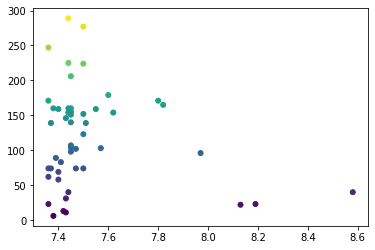

In [60]:
plt.scatter(df_outs["Rating"], df_outs["cluster"], s=25, c=df_outs["cluster"])
plt.show()

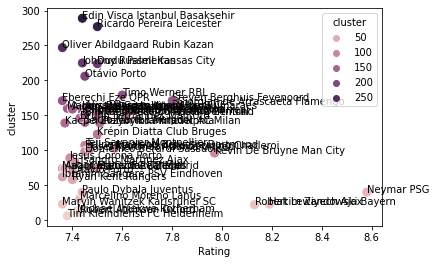

In [61]:
import seaborn as sns
sns.scatterplot(x='Rating', 
                y='cluster', 
                hue='cluster',
                s=100, 
                data=df_outs)

for i,k,p in zip(df_outs["Rating"],df_outs["cluster"],df_outs["name"]):
    plt.text(i, k, p)
    

plt.show()

#결과는 nan 값 즉 아웃츠 중에 분류가 안된 녀석들 뺴고는 다 나옴 / 전체 아웃츠가 포함되도록 세팅해서 돌려보면 괜찮을 듯
#이후 결과 검증은 이름나지 않은 선수들이 현재 시즌에 어떤 팀으로 옮겼나 혹은 퍼포먼스? 이건 너무 간거 갔기도 함


#다듬거나 생각해야할 부분들

#1. 시각화 부분에서는 좀더 다듬어야할 필요가 보이긴 함
#2. 현재는 나쁜 지표까지도 포함해서 클러스터링을 하고 있다. 최고의 선수들과 함께 클러스터링 되는 것을 보는 관점이라면
#굳이 나쁜 것까지 생각해야하나? 그렇게 생각하면 나쁜 지표에서 탑을 달리는 선수들이 아웃라이어에 포함되는 것이 아닌가?
#3. 위에 대한 답으로는 일정 rating 이상을 보도록 하면 될 듯하다.

#아무튼 결론적으로 절대 어느 클러스터에도 속하지 않으려는 튀는 값들 즉 성적이 뛰어난 선수들을 어떻게든 분리하는게 목적이라면
#k의 개수를 많이 늘리는 것이 절대적으로 좋다? 라는 물음에 대해 고민해야함